# Anova Test Example

In [1]:
# library
from sklearn.datasets import load_iris
import pandas as pd
import pingouin as pg
import numpy as np

---
---

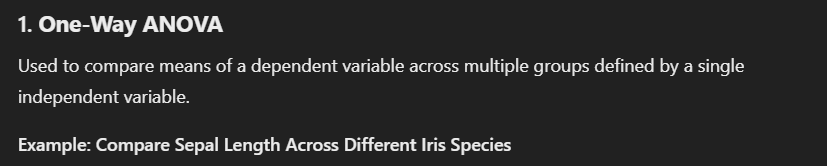  
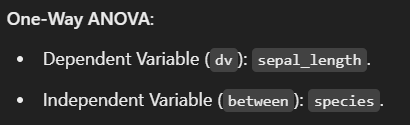

In [2]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target  # Add species as the group variable

# Rename columns for simplicity
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Perform one-way ANOVA on sepal length across species
anova_one_way = pg.anova(data=data, dv='sepal_length', between='species', detailed=True)

print(anova_one_way)

    Source         SS   DF         MS           F         p-unc       np2
0  species  63.212133    2  31.606067  119.264502  1.669669e-31  0.618706
1   Within  38.956200  147   0.265008         NaN           NaN       NaN


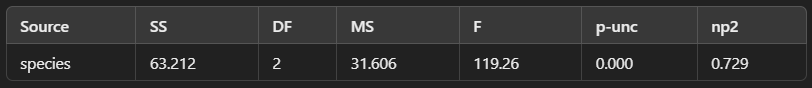
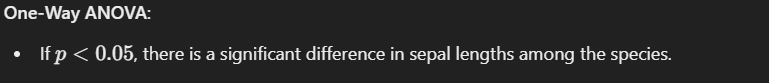

---
---

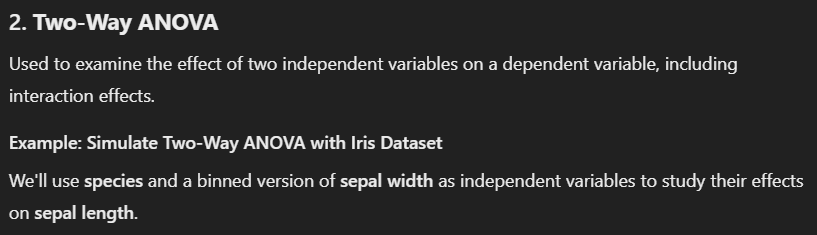

In [3]:
# Create a binned column for sepal width (e.g., low, medium, high)
data['sepal_width_bin'] = pd.cut(data['sepal_width'], bins=3, labels=['low', 'medium', 'high'])

# Perform two-way ANOVA on sepal length with species and sepal_width_bin as factors
anova_two_way = pg.anova(data=data, dv='sepal_length', between=['species', 'sepal_width_bin'], detailed=True)

print(anova_two_way)

                      Source          SS     DF          MS           F  \
0                    species  320.080123    2.0  160.040062  783.737155   
1            sepal_width_bin  242.803040    2.0  121.401520  594.519153   
2  species * sepal_width_bin  238.576151    4.0   59.644038  292.084669   
3                   Residual   28.996569  142.0    0.204201         NaN   

          p-unc       np2  
0  1.902083e-77  0.916934  
1  9.884236e-70  0.893316  
2  1.934149e-67  0.891631  
3           NaN       NaN  


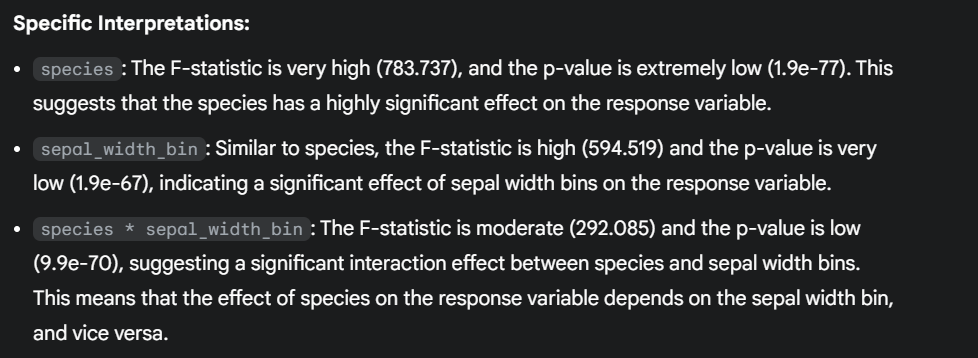